# IBM Capstone Project

## Bicycling in Seattle

### Query Background

<p> The city of Seattle is known for its environmentally minded citizens, and one of the best methods for travel is by bike. 

According to Bicycling.com Seattle is the best city for cycling in America. The city has some of the best lanes in the country, example, there are barriers that protect riders from traffic. Whether that’s a concrete block that weighs hundreds of pounds or a raised row of planters, these physical separations defend cyclists against out-of-control drivers, or those trying to sneak through to park in the bike lane.</p>

[Seattle is the best bike city in America](https://www.bicycling.com/culture/a23458655/seattle-is-the-best-bike-city-in-america/)

### Data

The Fremont Bridge Bicycle Counter began operation in October 2012 and records the number of bikes that cross the bridge using the pedestrian/bicycle pathways. 
- Inductive loops on the east and west pathways count the passing of bicycles regardless of travel direction. 
- The data consists of a date/time field: Date, 
- east pathway count field: Fremont Bridge NB, and west pathway count field: Fremont Bridge SB. 
- The count fields represent the total bicycles detected during the specified one hour period. 
- Direction of travel is not specified, but in general most traffic in the Fremont Bridge NB field is travelling northbound and most traffic in the Fremont Bridge SB field is travelling southbound.
<br>
<br>
The dataset comes from Seattle's department of Transportation, the Fremont Bridge dataset has count totals for both bridges
- link: [Fremont Bridge Bicycle Counter](https://data.seattle.gov/Transportation/Fremont-Bridge-Bicycle-Counter/65db-xm6k)

### Data Exploration and Cleaning

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [30]:
# Load the dataset
bike = pd.read_csv("FremontHourly.csv", index_col='Date', parse_dates=True)
bike.head()

,Fremont Bridge NB,Fremont Bridge SB
Date,,
2012-10-02 00:00:00,0.0,0.0
2012-10-02 01:00:00,0.0,0.0
2012-10-02 02:00:00,0.0,0.0
2012-10-02 03:00:00,0.0,0.0
2012-10-02 04:00:00,0.0,0.0


In [31]:
bike.shape

(14568, 2)

In [32]:
bike.dropna(how='all')

,Fremont Bridge NB,Fremont Bridge SB
Date,,
2012-10-02 00:00:00,0.0,0.0
2012-10-02 01:00:00,0.0,0.0
2012-10-02 02:00:00,0.0,0.0
2012-10-02 03:00:00,0.0,0.0
2012-10-02 04:00:00,0.0,0.0
...,...,...
2014-05-31 19:00:00,69.0,65.0
2014-05-31 20:00:00,43.0,61.0
2014-05-31 21:00:00,27.0,27.0


In [33]:
bike.isnull().sum()

Fremont Bridge NB    22
Fremont Bridge SB    22
dtype: int64

In [136]:
bike.isnull()

,northbound,southbound,total
northbound,False,False,False
southbound,False,False,False
total,False,False,False


In [34]:
# create a column for bridge total
bike.columns = ['northbound', 'southbound']
bike['total'] = bike['northbound'] + bike['southbound']

In [35]:
bike.columns

Index(['northbound', 'southbound', 'total'], dtype='object')

In [36]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14568 entries, 2012-10-02 00:00:00 to 2014-05-31 23:00:00
Data columns (total 3 columns):
northbound    14546 non-null float64
southbound    14546 non-null float64
total         14546 non-null float64
dtypes: float64(3)
memory usage: 1.1 MB


In [37]:
bike.describe()

,northbound,southbound,total
count,14546.000000,14546.000000,14546.000000
mean,49.002475,51.663481,100.665956
std,75.025244,65.782867,127.081766
min,0.000000,0.000000,0.000000
25%,7.000000,7.000000,15.000000
50%,26.000000,29.000000,57.000000
75%,60.000000,69.000000,134.000000
max,2621.000000,698.000000,2679.000000


In [38]:
# using Pandas dataframe.resample() 
# Convenience method for frequency conversion and resampling of time series. 
# Object must have a datetime-like index (DatetimeIndex, PeriodIndex, or TimedeltaIndex), 
# or pass datetime-like values to the on or level keyword. 

daily = bike.resample('d').sum()
weekly = daily.resample('w').sum()

## Data Visualization

Text(0, 0.5, 'Weekly riders')

<Figure size 1440x1080 with 0 Axes>

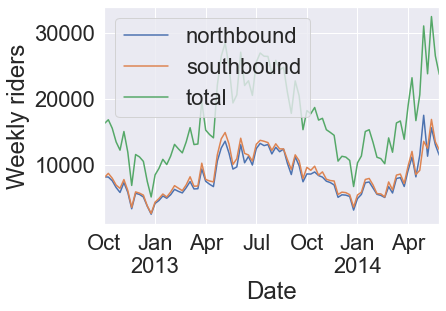

In [114]:
# plot the data

plt.figure(figsize=(20,15))
#sns.set(font_scale=2)

weekly[['northbound', 'southbound', 'total']].plot()
plt.ylabel('Weekly riders')


The Southbound bridge weekly crossing is represented 


The red line shows the total number of weekly crossings, which is the sum of the northbound and southbound crossings.

At first glance, April and May 2014 include some spikes in the data: over 32,000 riders per week crossed the bridge one week in the month of May.

Text(0, 0.5, 'weekly bicycle traffic')

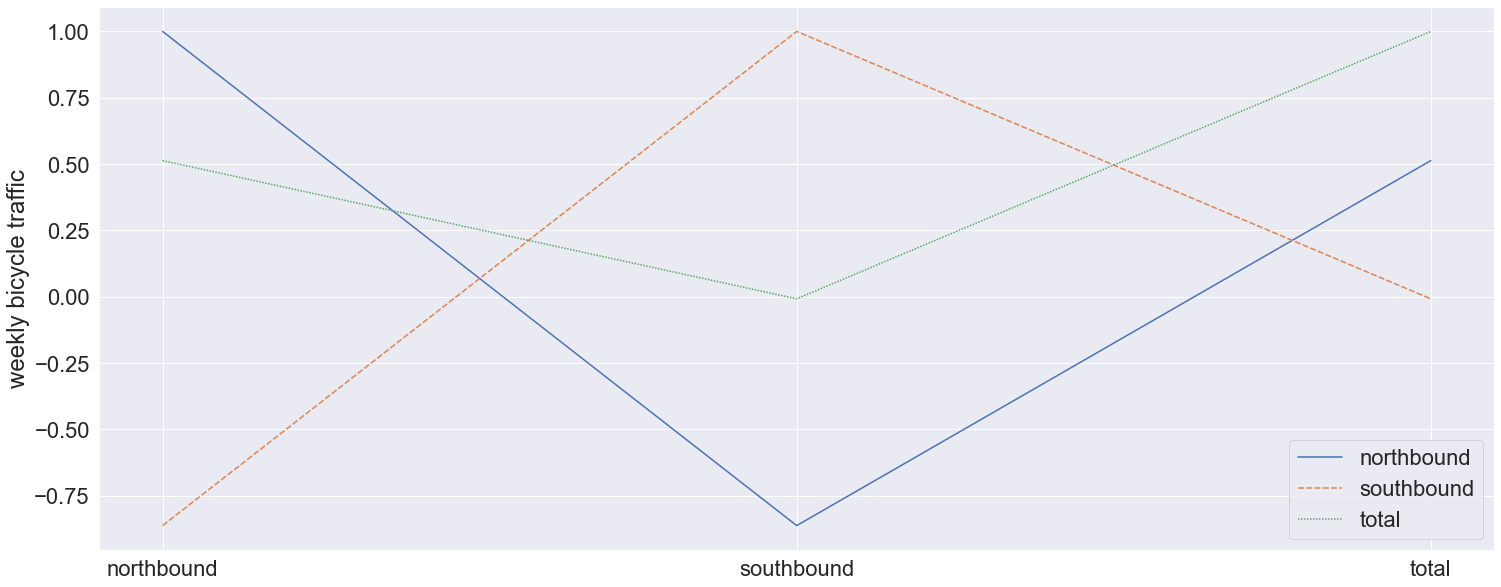

In [113]:

plt.figure(figsize=(25,10))
sns.lineplot(data=bike)
plt.ylabel('weekly bicycle traffic')

In [81]:
# days of the week

days = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
daily['dayofweek'] = daily['total'].index.dayofweek

/usr/local/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


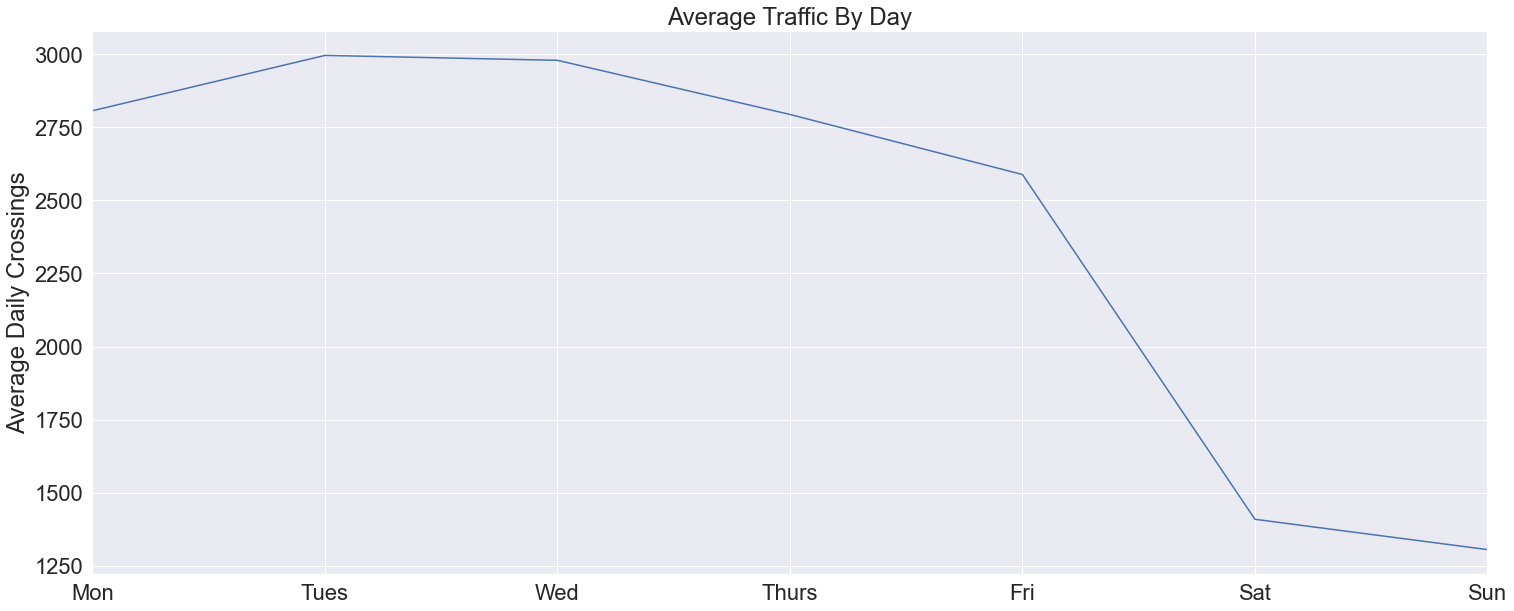

In [83]:
grouped = daily.groupby('dayofweek')['total'].mean()
grouped.index = days

plt.figure(figsize=(25,10))

grouped.plot()
plt.title("Average Traffic By Day")
plt.ylabel("Average Daily Crossings");

<AxesSubplot:xlabel='Date'>

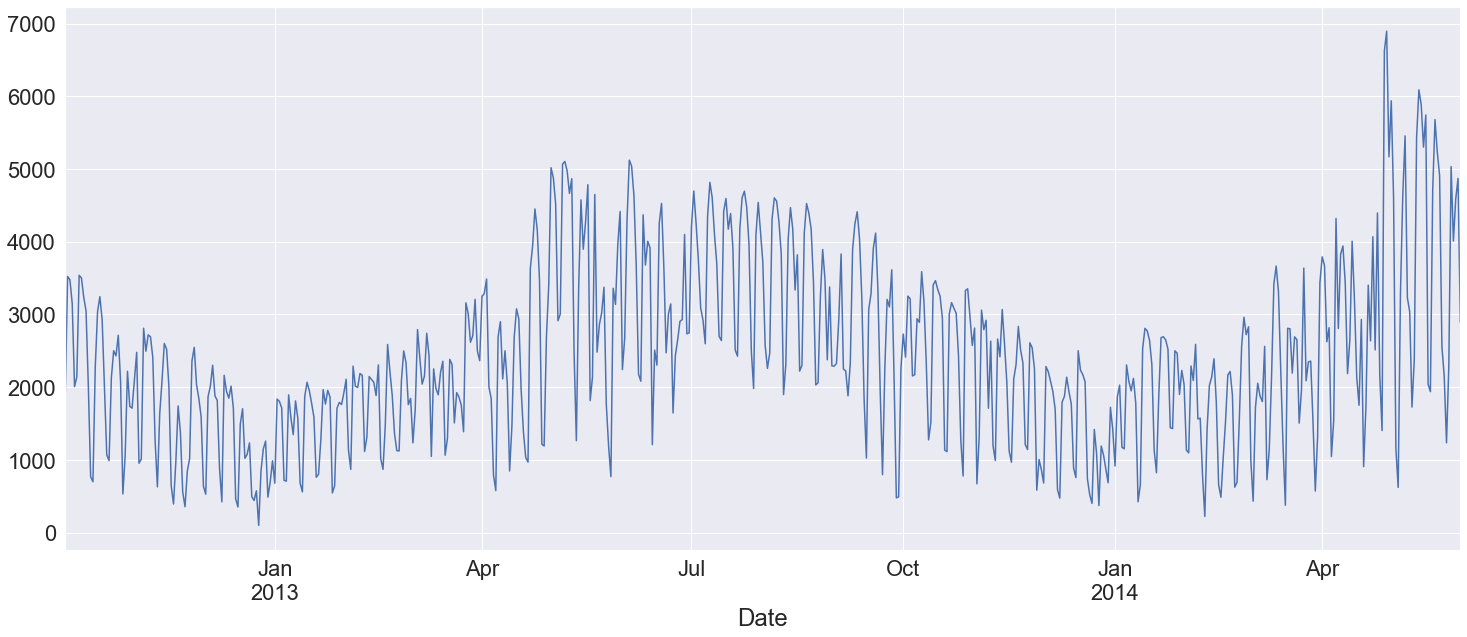

In [90]:

plt.figure(figsize=(25,10))
daily['total'].plot()